In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.optimize import curve_fit
from scipy.optimize import brute
from tkinter import Tk
from tkinter import filedialog as fd

In [18]:
def gaus(x,a,x0,sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

Mean:  5.913442391474436
Standard deviation:  0.33795361247361155


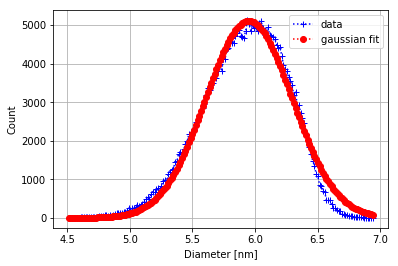

In [20]:
root = Tk()
folder_selected = fd.askdirectory(title = "Choose the folder containing the results")
root.withdraw()

dList = []
for file in os.listdir(folder_selected):
    f = open(folder_selected + '/' + file ,'r')
    i = 0
    for line in f:
        newline = line.split()
        if i > 6:
            dList.append(float(newline[6]))
        i += 1
    i = 0

dArray = np.asarray(dList)
mean = np.mean(dArray)
std = np.std(dArray)
print("Mean: ", mean)
print("Standard deviation: ", std)

hist, bins = np.histogram(dArray, bins = 'fd')
centers = [(i + bins[n])/2 for n, i in enumerate(bins[1:])]
popt,pcov = curve_fit(gaus,centers,hist,p0=[1,mean,std])
plt.plot(centers,hist,'b+:',label='data')
plt.plot(centers,gaus(centers,*popt),'ro:',label='gaussian fit')
plt.legend()
plt.grid()
plt.xlabel('Diameter [nm]')
plt.ylabel('Count')
plt.show()